### RFM 분석
#### 사용자별로 얼마나 최근에, 얼마나 자주, 얼마나 많은 금액을 지출했는지에 따라 사용자들의 분포를 확인할 수 있고, 사용자 그룹(또는 등급)을 나누어 분류하는 분석 기법이다. 구매 가능성이 높은 고객을 선정할 떄 용이한 데이터 분석 방법이며, 사용자들의 평소 구매 패턴을 기준으로 분류를 진행하기 때문에 각 사용자 그룹의 특성에 따라 차별화된 마케팅 메세지를 전달할 수 있다.

- Recency : 얼마나 최근에 구매했는가
- Frequency : 얼마나 자주 구매했는가
- Monetary : 얼마나 많은 금액을 지출했는가

,CustomerID,Frequency
0,1,3
1,2,1
2,3,7
3,4,2


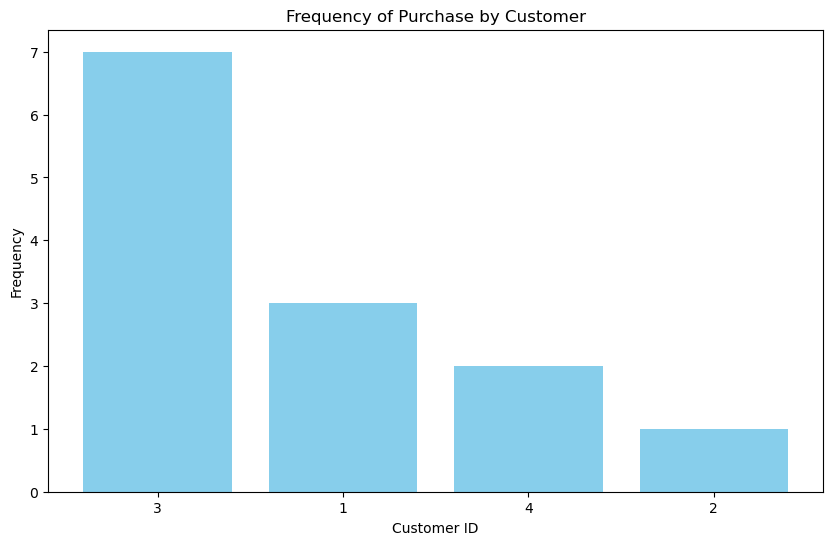

In [7]:
# 나홀로 예습
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'CustomerID': [1, 2, 3, 4],
    'Frequency': [3, 1, 7, 2]
}

df = pd.DataFrame(data)
display(df)

# Frequency를 기준으로 내림차순 정렬
sorted_df = df.sort_values(by='Frequency', ascending=False)

# 시각화
plt.figure(figsize=(10,6))
plt.bar(sorted_df['CustomerID'].astype(str), sorted_df['Frequency'], color='skyblue')
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.title('Frequency of Purchase by Customer')
plt.show()


### 🛒이커머스 플랫폼 A기업의 RFM 분석
📌이커머스: 온라인을 통해 상품이나 서비스를 사고파는 서비스 (쿠팡, 11번가, 네이버 등)

 
<table style="width: 50%; margin-left:10px;">
    <caption>고객 분석</caption>
    <tr>
        <th>사용자</th>
        <th>구매 횟수</th>
        <th>구매 금액</th>
        <th>최근 구매일</th>
    </tr>
    <tr>
        <th>한동석</th>
        <th>45</th>
        <th>1,980,000</th>
        <th>2개월 전</th>
    </tr>
    <tr>
        <th>주선유</th>
        <th>2</th>
        <th>45,320</th>
        <th>1년 전</th>
    </tr>
</table>

##### 👓 "한동석" 고객을 VIP로 선정해서 연말 선물을 전달하면, 충성심있는 고객으로 유지할 수 있는 전략을 세울 수도 있고,<br> 🎫 "주선유" 고객에게 할인 쿠폰 등 자사의 플랫폼을 이용할 거리를 전달함으로써, 구매를 유도할 수 있는 전략을 세울 수도 있다.

####  RFM을 사용하면 사용자의 특성별로 각기 다른 정책을 적용하고 서비스를 더 잘 사용하게끔 유도하는 전략을 세워볼 수가 있다.

### 고객 분석

- 사람들

> ID: 고객의 고유 식별자  
Year_Birth: 고객의 출생 연도  
Education: 고객의 교육 수준  
Marital_Status: 고객의 결혼 상태  
Income: 고객의 연간 가구 소득  
Kidhome: 고객 가구의 자녀 수  
Teenhome: 고객 가구의 청소년 수  
Dt_Customer : 고객이 회사에 등록된 날짜  
Recency: 고객의 마지막 구매 이후 경과된 일수  
Complain: 지난 2년 동안 고객이 불만 사항을 제기한 경우 1, 그렇지 않은 경우 0  

- 제품

> MntWines: 지난 2년간 와인에 지출한 금액  
MntFruits: 지난 2년간 과일에 지출한 금액  
MntMeatProducts: 지난 2년간 육류에 지출한 금액  
MntFishProducts: 지난 2년간 생선에 지출한 금액  
MntSweetProducts: 지난 2년간 과자에 지출한 금액  
MntGoldProds: 지난 2년간 금에 지출된 금액  

- 홍보

> NumDealsPurchases: 할인된 구매 횟수  
AcceptedCmp1: 고객이 첫 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  
AcceptedCmp2: 고객이 두 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  
AcceptedCmp3: 고객이 세 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  
AcceptedCmp4: 고객이 4번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  
AcceptedCmp5: 고객이 5번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  
Response: 고객이 마지막 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  

- 장소

> NumWebPurchases: 회사 웹사이트를 통해 이루어진 구매 횟수  
NumCatalogPurchases: 카탈로그를 사용하여 구매한 횟수  
NumStorePurchases: 매장에서 직접 구매한 횟수  
NumWebVisitsMonth: 지난 달 회사 웹사이트 방문 횟수  

In [11]:
import pandas as pd
path = "../datasets/customer_personality_analysis.csv"
customer_personality_df = pd.read_csv(path, sep="\t")

# 데이터 확인하기
customer_personality_df

# 컬럼의 자세한 정보 확인하기
customer_personality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i